In [ ]:
# all package import here

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[texte du lien](https://)# Band reduction in multispectral images

AOS1 homework1

author:
Chen GONG
Yunfei ZHAO

date:
5/oct/2020


## Introduction
For this home work, we use PCA dimension reduction to reduce the bands for multispectral images. The picture we take for the study is "Indian Pines" from http://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes.

The python library we used is below:

In [ ]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

## Data presentation
The image we use is "Indian_pines_corrected.mat", the origin "Indian pines" has a size of $145 \times 145$ and with a third dimension of size 220 which correspond to the spectral reflectance bands in the wavelength range $0.4 – 2.5 \times 10^{-6}$ meters. "Indian_pines_corrected.mat" has already remove the spectrals which  is absorbed by water. So we take it as a sample and try to reduce the last dimension to the size of 3, in order to visualise it. "Indian_pines_gt" is the label matrix and on each position, we have a number correspond to the type of region we have.

In [ ]:
X = sio.loadmat("Indian_pines")["indian_pines"]
print(f"Indian_pines shape:{X.shape}")
X_corrected = sio.loadmat("Indian_pines_corrected.mat")['indian_pines_corrected']
print(f"Indian_pines_corrected shape:{X_corrected.shape}")
X_gt = sio.loadmat("Indian_pines_gt")["indian_pines_gt"]
print(f"label matrix shape:{X_gt.shape}")

Indian_pines shape:(145, 145, 220)
Indian_pines_corrected shape:(145, 145, 200)
label matrix shape:(145, 145)


In [ ]:
np.unique(X_gt)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

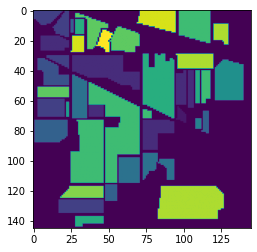

In [ ]:
plt.imshow(X_gt/16)

## A simple dimension reduction function
We select the elements of the last dimension by giving the index. We found that the result is not very ideal, because we can not see clearly the border of the regions and there are so many noise on the images.

In [ ]:
def simple_band_reduction(im, column_index):
    X = im.reshape((-1, im.shape[-1]))
    X = X[:, column_index]
    scaler =  MinMaxScaler(feature_range=(0, 1))
    scaler.fit(X)
    reduced_im = scaler.transform(X)
    reduced_im = reduced_im.reshape(im.shape[0], im.shape[1], 3)
    reduced_im[reduced_im < 0] = 0
    reduced_im[reduced_im > 1] = 1
    return reduced_im

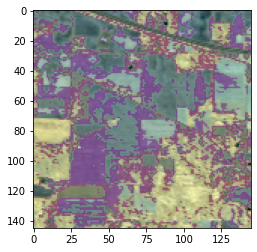

In [ ]:
reduced_im = simple_band_reduction(X_corrected, (50, 60, 80))
plt.imshow(reduced_im)

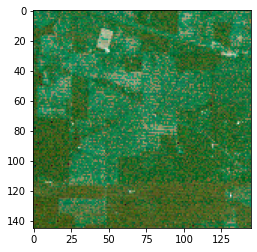

In [ ]:
reduced_im = simple_band_reduction(X_corrected, (0,1,2))
plt.imshow(reduced_im)

## PCA analyse
From the explained variance bar figure, we infer that the cut of elbow take place at the third most important principle vector. So we can directly make the PCA dimenction reduction directly. But there are two cases:

1, Scale the value before PCA, and do the pca, then do the final scale to make sure that the value is bwtween 0 and 1.

2, Do not do the pre-scale of the data

The first one may matigate the influence of the big scale differences during the PCA process.

<BarContainer object of 200 artists>

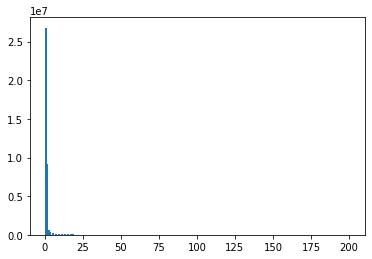

In [ ]:
X = X_corrected.reshape((-1, X_corrected.shape[-1]))
pca = PCA()
pca.fit(X)
plt.bar(range(1, X.shape[1] + 1), pca.explained_variance_)

In [ ]:
def pca_band_reduction(im, scaled_before_pca=None):
    pca = PCA(n_components=3)
    scaler =  MinMaxScaler(feature_range=(0, 1))
    if scaled_before_pca == True:
        pre_scaler =  MinMaxScaler(feature_range=(0, 1))
        im_pca = Pipeline([("pre_scaler", pre_scaler), ("pca", pca), ("scaler", scaler)])
    else:
        im_pca = Pipeline([("pca", pca), ("scaler", scaler)])
    
    X = im.reshape((-1, im.shape[-1]))
    im_pca.fit(X)
    reduced_im = im_pca.transform(X).reshape(im.shape[0], im.shape[1], 3)
    reduced_im[reduced_im < 0] = 0
    reduced_im[reduced_im > 1] = 1
    return reduced_im

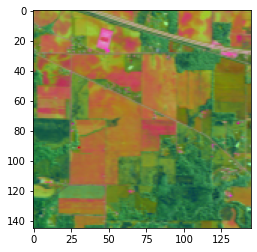

In [ ]:
reduced_im = pca_band_reduction(X_corrected)
plt.imshow(reduced_im)

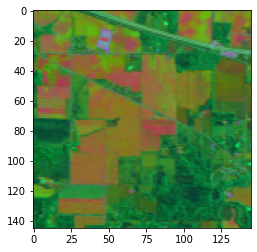

In [ ]:
reduced_im_prescale = pca_band_reduction(X_corrected, scaled_before_pca=True)
plt.imshow(reduced_im_prescale)

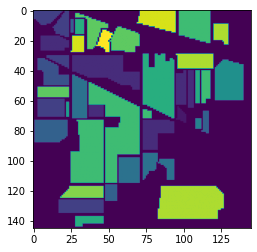

In [ ]:
# sample
plt.imshow(X_gt/16)

## Analyse of these three dimension
we can see that the region information is very clear on the fisrt pca dimension and the rout information is well presented on the third pca dimension.

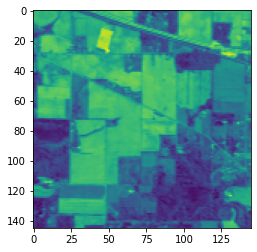

In [ ]:
plt.imshow(reduced_im[:,:,0])

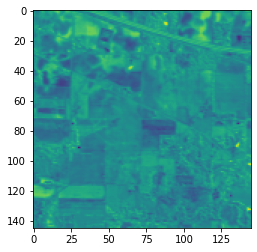

In [ ]:
plt.imshow(reduced_im[:,:,1])

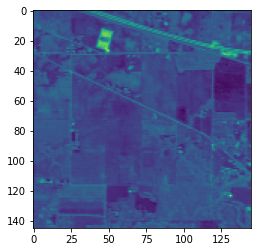

In [ ]:
plt.imshow(reduced_im[:,:,2])

## Conclusion
We found that PCA is a better solution for this mission. It not only can well present the necessary information on the original image, but also can reduce the noise given by other less important dimensions.